# Parse CSI

In [27]:
import re
from math import sqrt, atan2
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

if __name__ == "__main__":
    """
    This script file demonstrates how to transform raw CSI out from the ESP32 into CSI-amplitude and CSI-phase.
    """

    FILE_NAME = "../active_sta/data/my-experiment-file.csv"

    f = open(FILE_NAME)
    amp_all = []
    # skip the first line: header
    f.readline()
    for j, l in enumerate(f.readlines()):
        imaginary = []
        real = []
        amplitudes = []
        phases = []

        # Parse string to create integer list
        csi_string = re.findall(r"\[(.*)\]", l)[0]
        csi_raw = [int(x) for x in csi_string.split(" ") if x != '']

        # Create list of imaginary and real numbers from CSI
        for i in range(len(csi_raw)):
            if i % 2 == 0:
                imaginary.append(csi_raw[i])
            else:
                real.append(csi_raw[i])

        # Transform imaginary and real into amplitude and phase
        for i in range(int(len(csi_raw) / 2)):
            amplitudes.append(sqrt(imaginary[i] ** 2 + real[i] ** 2))
            phases.append(atan2(imaginary[i], real[i]))
        
        amp_all.append(amplitudes)
        # print("-------------------")
        # print("csi_amplitude#{}:".format(j), amplitudes)
        # print("csi_phase#{}:    ".format(j), phases)
        # print("-------------------")

    arr = amp_all
    # scipy.io.savemat('./bpm15_2.mat', mdict={'arr': arr})

# Remove unused Subcarriers and reorder subcarriers

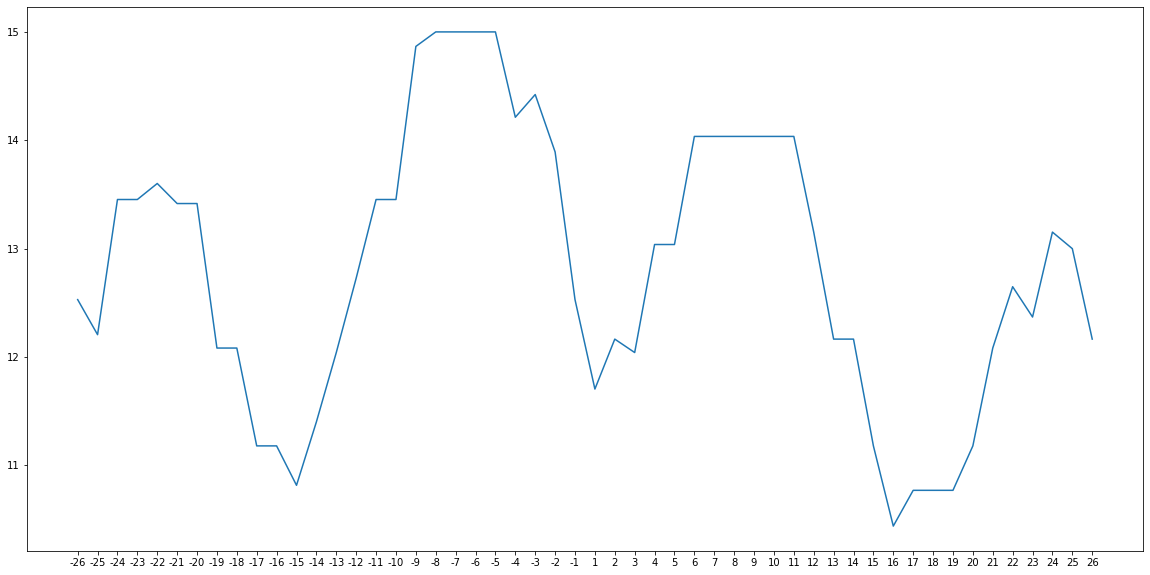

In [37]:
# real index of subcarrers. from 0 to 31, -32 to -1
# see https://docs.espressif.com/projects/esp-idf/en/latest/esp32/api-guides/wifi.html?highlight=csi#wi-fi-channel-state-information
SUB_INX_20MHZ = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]
UNUSED_SUB_IDX_20MHZ = [0, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
# Final (real) index of subcarriers
useful_sub = [i for i in range(-26, 0)] + [i for i in range(1, 27)]
# order_axis is index of sub_axis in SUB_INX_20MHZ
sub_order = [SUB_INX_20MHZ.index(i) for i in useful_sub]

def sort_sub(csi_all, sub_order=sub_order):
    csi_all = np.array(csi_all)
    csi_all = csi_all[:, sub_order]
    return csi_all

# plt.plot(amp_all[0])
csi_all = sort_sub(amp_all)
# set figure size
plt.figure(figsize=(20, 10))
plt.plot(csi_all[0])
plt.xticks(range(len(useful_sub)), useful_sub)
plt.show()